# CIFAR-10 Feature Representation Analysis

This notebook demonstrates a comprehensive comparison of different image feature representations for visual recognition tasks. We investigate how various feature extraction methods impact classification performance on the CIFAR-10 dataset.

## Overview

The CIFAR-10 dataset contains 50,000 training images and 10,000 test images across ten classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). Each image is 32×32 pixels in color.

## Feature Representations Evaluated

1. **Raw Pixel Space** - Direct pixel intensity values
2. **Histogram of Oriented Gradients (HOG)** - Traditional computer vision features
3. **Convolutional Neural Network (CNN) Features**
    * Intermediate-level and high-level features from **pretrained** VGG-11
    * Intermediate-level and high-level features from **randomly initialized** VGG-11

## Methodology

We employ k-nearest neighbor classification with Euclidean distance to evaluate each representation method, providing a controlled comparison across feature spaces.

## Requirements

- Python 3.12+
- PyTorch 2.8+ (CPU sufficient)
- scikit-learn, scikit-image
- NumPy, Matplotlib, tqdm, torchinfo

## Project Structure

The analysis utilizes modular components:
- `dataset.py`: Data loading and visualization utilities
- `extract_feature.py`: Feature extraction implementations  
- `vgg_network.py`: VGG-11 architecture and pretrained models
- `path.py`: Directory configuration management

## 1. Dataset Preparation

### Download CIFAR-10 Dataset

First, we download the CIFAR-10 dataset. The dataset will be automatically saved to the `datasets/` directory.

In [1]:
from dataset import download_cifar10_dataset
dataset = download_cifar10_dataset()

✓ CIFAR-10 dataset downloaded successfully to ./datasets/


### Load Training and Test Sets

Load the preprocessed training and test splits with proper normalization.

In [2]:
from dataset import load_dataset_splits
x_train, y_train, x_test, y_test = load_dataset_splits()

======> CIFAR-10 dataset loaded
Training set data shape:  (50000, 3, 32, 32)
Training set label shape:  (50000,)
Test set data shape:  (10000, 3, 32, 32)
Test set label shape:  (10000,)


### Dataset Visualization

Explore the dataset by visualizing sample images from each class.

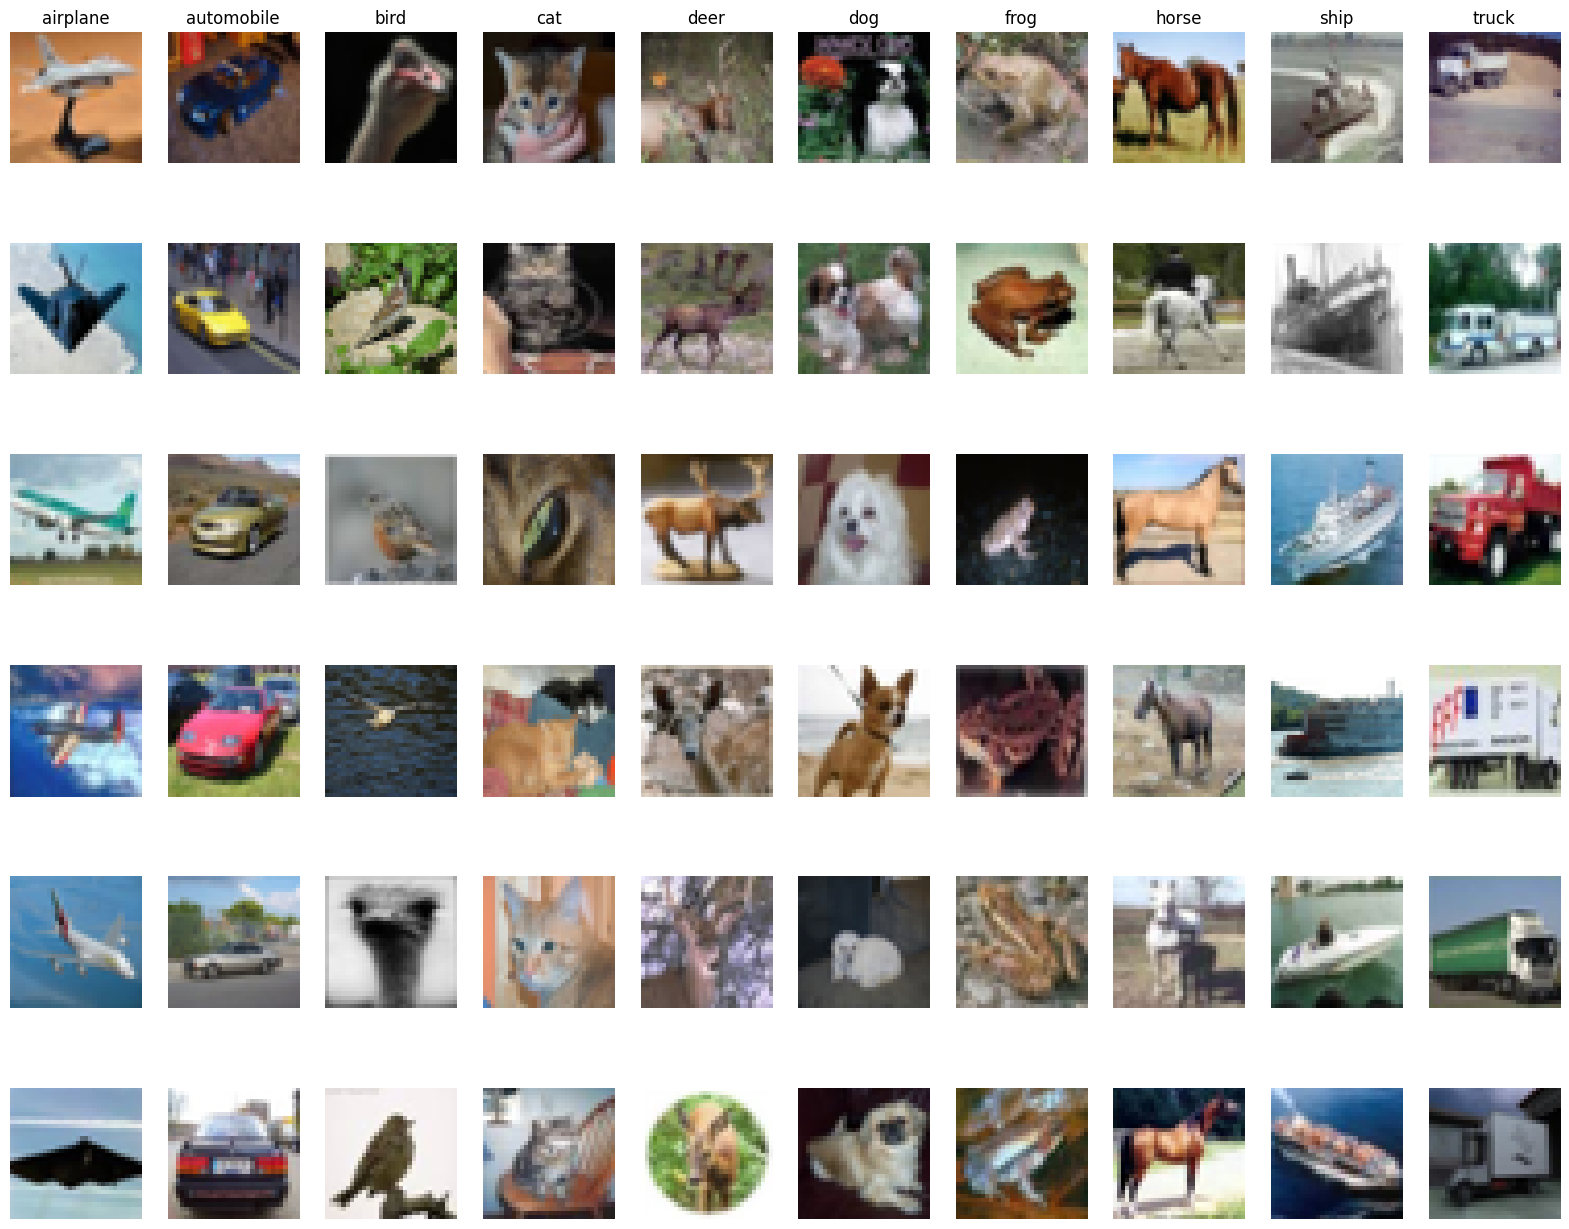

In [3]:
from dataset import visualize_cifar_data
visualize_cifar_data(images=x_train.transpose(0, 2, 3, 1), labels=y_train, samples_per_class=6)

## 2. k-Nearest Neighbor Classification Framework

We implement a k-nearest neighbor classifier using Euclidean (L2) distance to evaluate different feature representations. This provides a consistent evaluation framework across all feature types.

The `run_nearest_neighbor` function performs 1-NN classification and reports test accuracy.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

def run_nearest_neighbor(x_train, y_train, x_test, y_test):
    # create classifier
    nn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='auto')
    
    # train 
    nn_classifier.fit(x_train, y_train)

    # test and report accuracy
    test_acc = nn_classifier.score(x_test, y_test)
    print("Nearest neighbor accuracy on the test set: %f"%test_acc)
    
    return nn_classifier

### Baseline: Raw Pixel Features

We begin with raw pixel intensities as our baseline feature representation. This provides the simplest possible feature space for comparison.

The `compute_or_load_features` function extracts features with caching to avoid recomputation. Features are automatically saved to the `features/` directory for future use.

In [5]:
from extract_feature import compute_or_load_features

# compute or load features
raw_pixel_train_features, raw_pixel_test_features = compute_or_load_features(x_train, x_test, "raw_pixel")

# run knn
raw_pixel_knn_classifier = run_nearest_neighbor(raw_pixel_train_features, y_train, raw_pixel_test_features, y_test)

======> Done with computation of raw pixel features
======> Saved train and test features to ./datasets/
Training feature shape:  (50000, 3072)
Test feature shape:  (10000, 3072)
Nearest neighbor accuracy on the test set: 0.353900


## 3. Feature Dimensionality Analysis

Let's extract all feature representations and examine their dimensionalities to understand the complexity of each representation space.

In [6]:
# Raw pixel features
raw_pixel_train, raw_pixel_test = compute_or_load_features(x_train, x_test, 
                                                           "raw_pixel")

======> Loaded train and test features from ./datasets/
Training feature shape:  (50000, 3072)
Test feature shape:  (10000, 3072)


In [7]:
# HoG features
hog_train, hog_test = compute_or_load_features(x_train, x_test, 
                                               "hog")

100%|██████████| 10000/10000 [00:05<00:00, 1917.78it/s]


======> Done with computation of HoG features
======> Saved train and test features to ./datasets/
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)


In [8]:
#VGG-last-fc features
vgg_fc_train, vgg_fc_test = compute_or_load_features(x_train, x_test, 
                                                     "pretrained_cnn", 
                                                     layer="last_fc")

100%|██████████| 100/100 [00:21<00:00,  4.59it/s]


======> Done with computation of CNN features
======> Saved train and test features to ./datasets/
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)


In [9]:
# VGG-last-conv features
vgg_conv_train, vgg_conv_test = compute_or_load_features(x_train, x_test, 
                                                         "pretrained_cnn", 
                                                         layer="last_conv")

100%|██████████| 100/100 [00:18<00:00,  5.28it/s]


======> Done with computation of CNN features
======> Saved train and test features to ./datasets/
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)


In [10]:
# Random VGG -last-fc features
rand_fc_train, rand_fc_test = compute_or_load_features(x_train, x_test, 
                                                       "random_cnn", 
                                                       layer="last_fc")

100%|██████████| 100/100 [00:18<00:00,  5.42it/s]


======> Done with computation of CNN features
======> Saved train and test features to ./datasets/
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)


In [11]:
# Random VGG - last convolutional layer
rand_conv_train, rand_conv_test = compute_or_load_features(x_train, x_test, 
                                                           "random_cnn", 
                                                           layer="last_conv")

100%|██████████| 100/100 [00:18<00:00,  5.26it/s]


======> Done with computation of CNN features
======> Saved train and test features to ./datasets/
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)


## 4. Comparative Classification Performance

Now we evaluate 1-nearest neighbor classification performance across all feature representations.

In [12]:
# Raw pixel representation
raw_nn = run_nearest_neighbor(raw_pixel_train, y_train, raw_pixel_test, y_test)

Nearest neighbor accuracy on the test set: 0.353900


In [13]:
# HoG representation
hog_nn = run_nearest_neighbor(hog_train, y_train, hog_test, y_test)

Nearest neighbor accuracy on the test set: 0.365700


In [14]:
# VGG (pretrained CNN) - last fully connected layer
vgg_fc_nn = run_nearest_neighbor(vgg_fc_train, y_train, vgg_fc_test, y_test)

Nearest neighbor accuracy on the test set: 0.920700


In [15]:
# VGG (pretrained CNN) - last convolutional layer
vgg_conv_nn = run_nearest_neighbor(vgg_conv_train, y_train, vgg_conv_test, y_test)

Nearest neighbor accuracy on the test set: 0.920000


In [16]:
# Random VGG - last fully connected layer
rand_fc_nn = run_nearest_neighbor(rand_fc_train, y_train, rand_fc_test, y_test)

Nearest neighbor accuracy on the test set: 0.402700


In [17]:
# Random VGG - last convolutional layer
rand_conv_nn = run_nearest_neighbor(rand_conv_train, y_train, rand_conv_test, y_test)

Nearest neighbor accuracy on the test set: 0.394900


## 5. Qualitative Analysis: Nearest Neighbor Visualization

To understand how different representations capture image similarity, we visualize nearest neighbor relationships for both correct and incorrect classifications. This provides insights into the strengths and weaknesses of each feature space.

Raw Pixel Representation - Nearest Neighbor Analysis


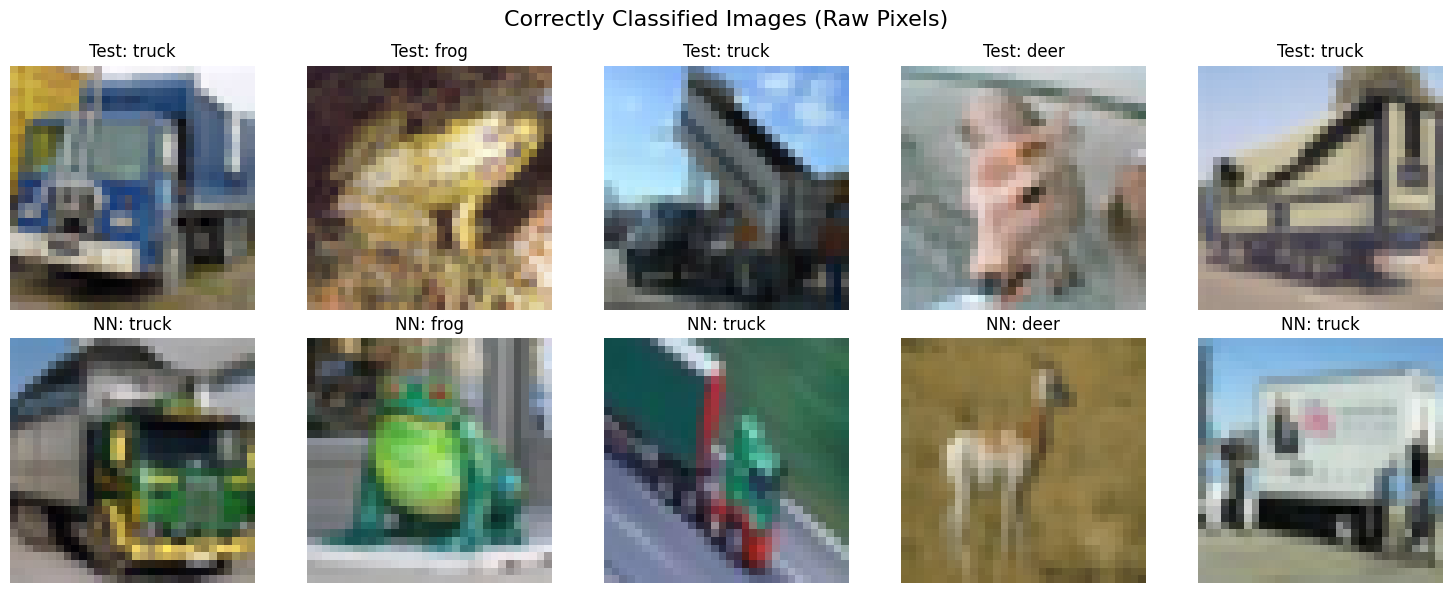

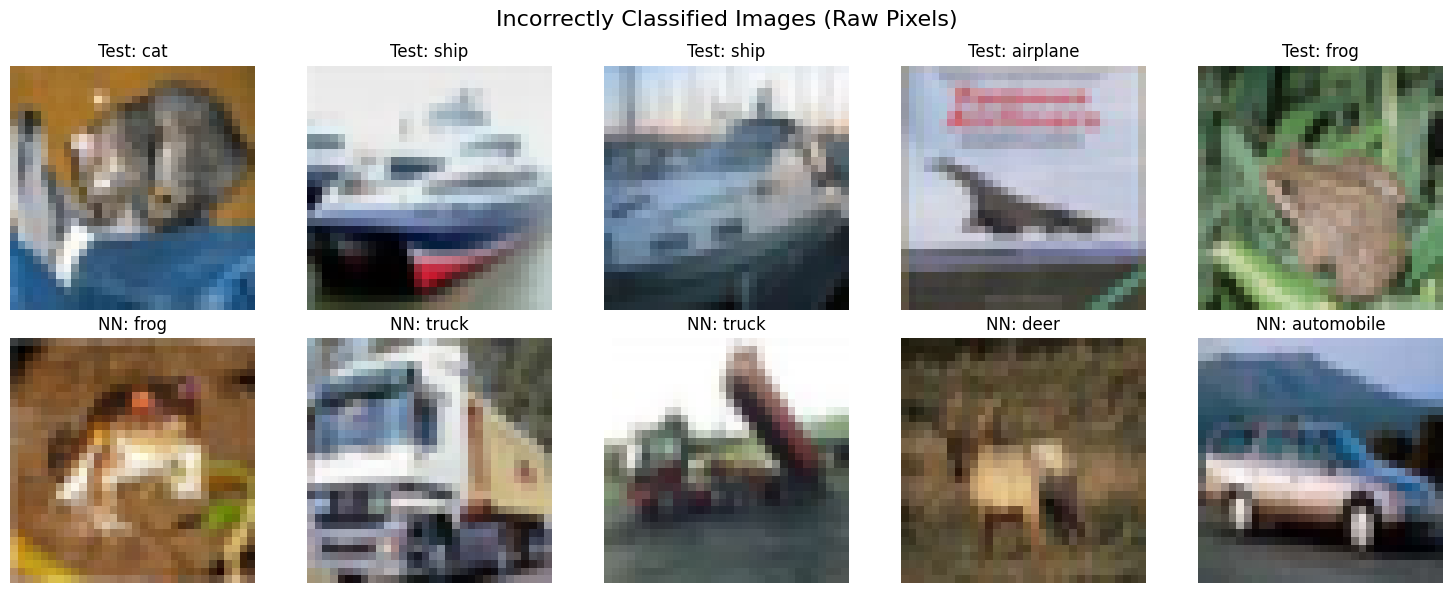

In [18]:
from visual_nn_results import visualize_nn_results

# Visualize nearest neighbor results for raw pixel representation
print("Raw Pixel Representation - Nearest Neighbor Analysis")
visualize_nn_results(raw_nn, x_train, y_train, x_test, y_test, feature_name="Raw Pixels")

### HOG Features Analysis

HOG (Histogram of Oriented Gradients) features capture local edge and texture information, providing a more structured representation than raw pixels.

In [19]:
from extract_feature import compute_or_load_features

# compute or load features
hog_train_features, hog_test_features = compute_or_load_features(x_train, x_test, "hog")
    
# run knn
hog_knn_classifier = run_nearest_neighbor(hog_train_features, y_train, hog_test_features, y_test)

======> Loaded train and test features from ./datasets/
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.365700


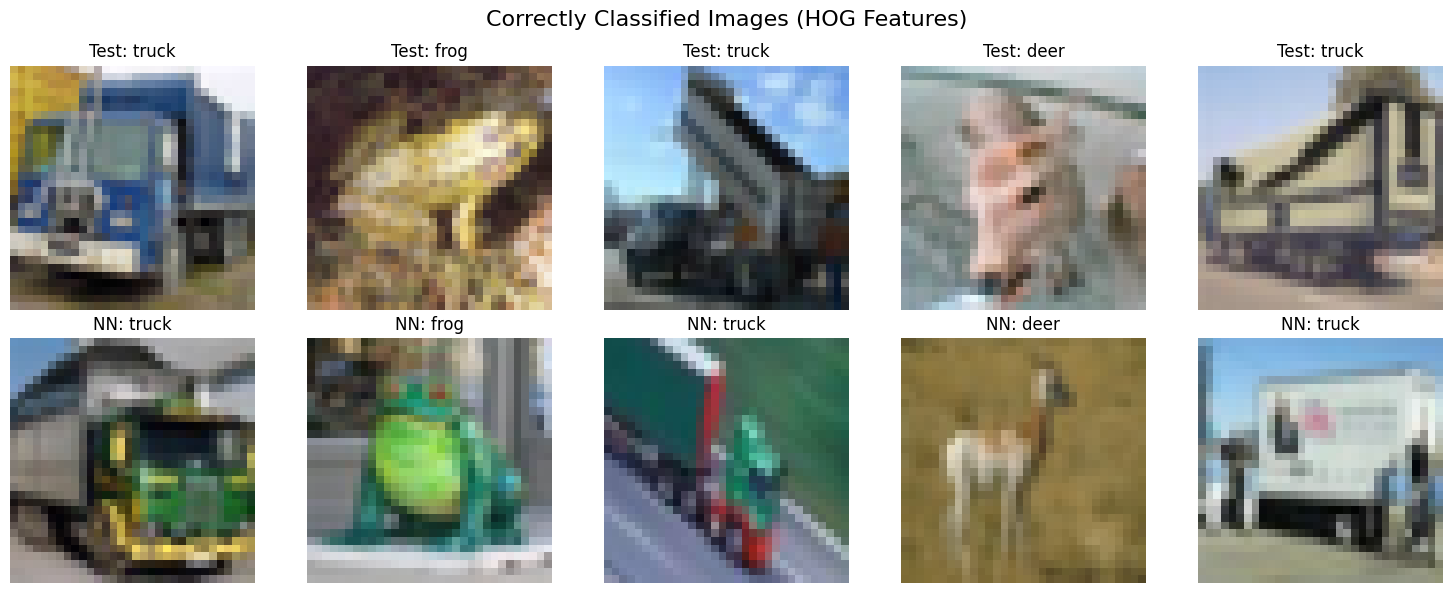

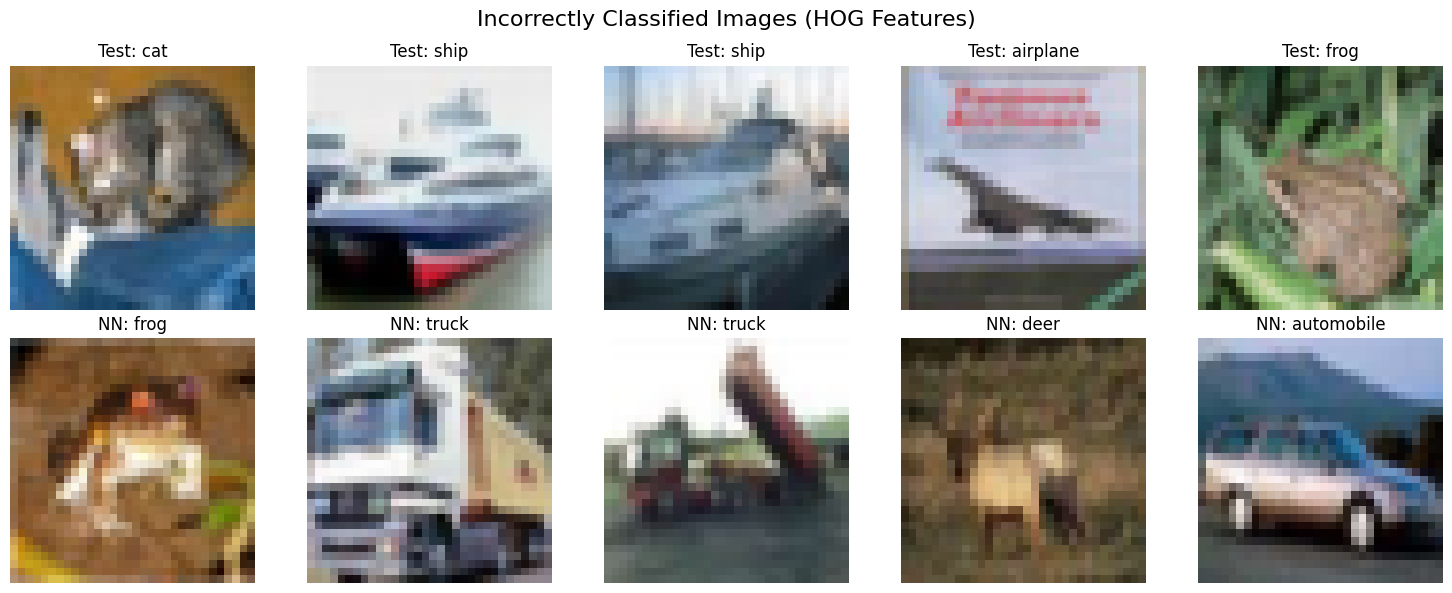

In [20]:
# Visualize nearest neighbor results for HOG representation
# Show correctly and incorrectly classified images with their nearest neighbors
from visual_nn_results import visualize_nn_results
visualize_nn_results(hog_knn_classifier, x_train, y_train, x_test, y_test, feature_name="HOG Features")

### CNN Features Analysis

Convolutional Neural Networks (CNNs) learn hierarchical feature representations from low-level edges to high-level semantic concepts. We analyze features from a VGG-11 architecture pretrained on CIFAR-10.

Let's first examine the VGG-11 architecture to understand the feature extraction layers.

In [21]:
from torchinfo import summary
from vgg_network import vgg11_bn

vgg_model = vgg11_bn(pretrained=False)
summary(vgg_model, input_size=(16, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [16, 10]                  --
├─Sequential: 1-1                        [16, 512, 1, 1]           --
│    └─Conv2d: 2-1                       [16, 64, 32, 32]          1,792
│    └─BatchNorm2d: 2-2                  [16, 64, 32, 32]          128
│    └─ReLU: 2-3                         [16, 64, 32, 32]          --
│    └─MaxPool2d: 2-4                    [16, 64, 16, 16]          --
│    └─Conv2d: 2-5                       [16, 128, 16, 16]         73,856
│    └─BatchNorm2d: 2-6                  [16, 128, 16, 16]         256
│    └─ReLU: 2-7                         [16, 128, 16, 16]         --
│    └─MaxPool2d: 2-8                    [16, 128, 8, 8]           --
│    └─Conv2d: 2-9                       [16, 256, 8, 8]           295,168
│    └─BatchNorm2d: 2-10                 [16, 256, 8, 8]           512
│    └─ReLU: 2-11                        [16, 256, 8, 8]           --


### Pretrained CNN Features

The VGG architecture consists of three main components:

1. **Convolutional blocks** - Extract low-level and intermediate-level spatial features
2. **Fully connected blocks** - Extract high-level semantic features  
3. **Classification layer** - Maps features to class predictions

We extract features from two key layers:
- `last_conv`: Final convolutional features (AdaptiveAvgPool2d output)
- `last_fc`: High-level fully connected features (ReLU activation output)

These represent different levels of abstraction in the learned feature hierarchy.

In [22]:
from extract_feature import compute_or_load_features

# compute or load features
pretrained_cnn_last_conv_train_features, pretrained_cnn_last_conv_test_features = compute_or_load_features(x_train, x_test, "pretrained_cnn", "last_conv")

# run knn
pretrained_cnn_last_conv_knn_classifier = run_nearest_neighbor(pretrained_cnn_last_conv_train_features, y_train, pretrained_cnn_last_conv_test_features, y_test)

======> Loaded train and test features from ./datasets/
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.920000


In [23]:
from extract_feature import compute_or_load_features

# compute or load features
pretrained_cnn_last_fc_train_features, pretrained_cnn_last_fc_test_features = compute_or_load_features(x_train, x_test, "pretrained_cnn", "last_fc")

# run knn
pretrained_cnn_last_fc_knn_classifier = run_nearest_neighbor(pretrained_cnn_last_fc_train_features, y_train, pretrained_cnn_last_fc_test_features, y_test)

======> Loaded train and test features from ./datasets/
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)
Nearest neighbor accuracy on the test set: 0.920700


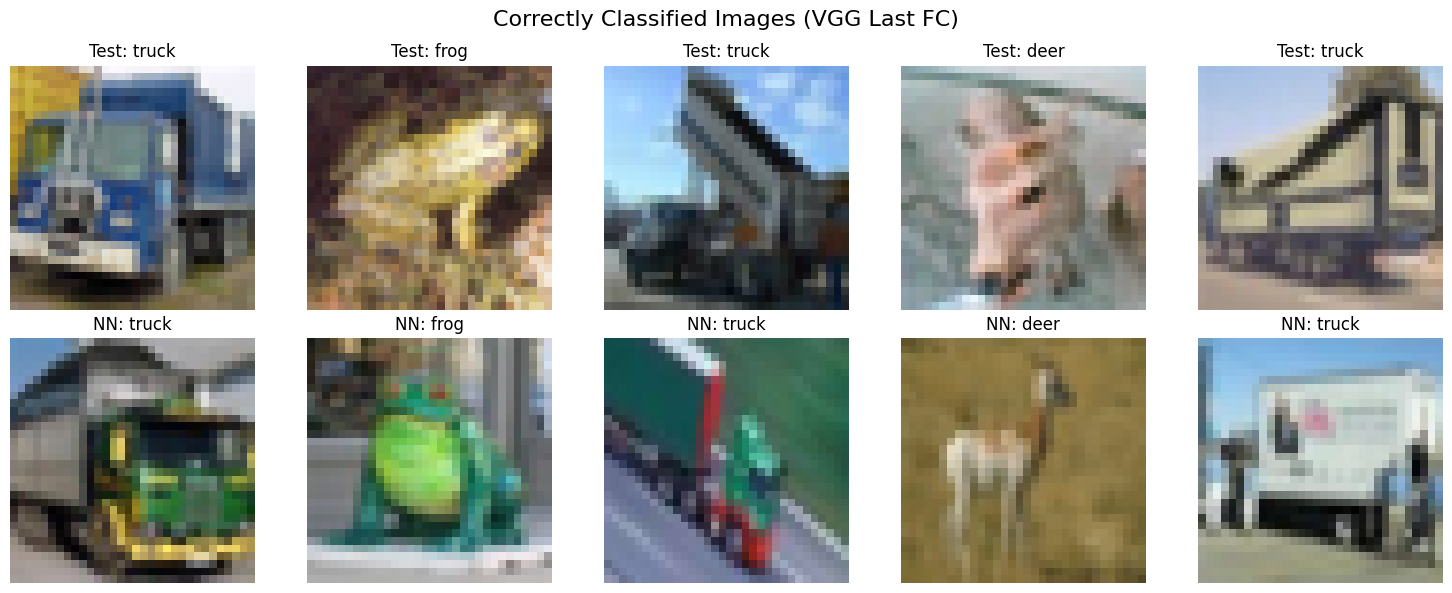

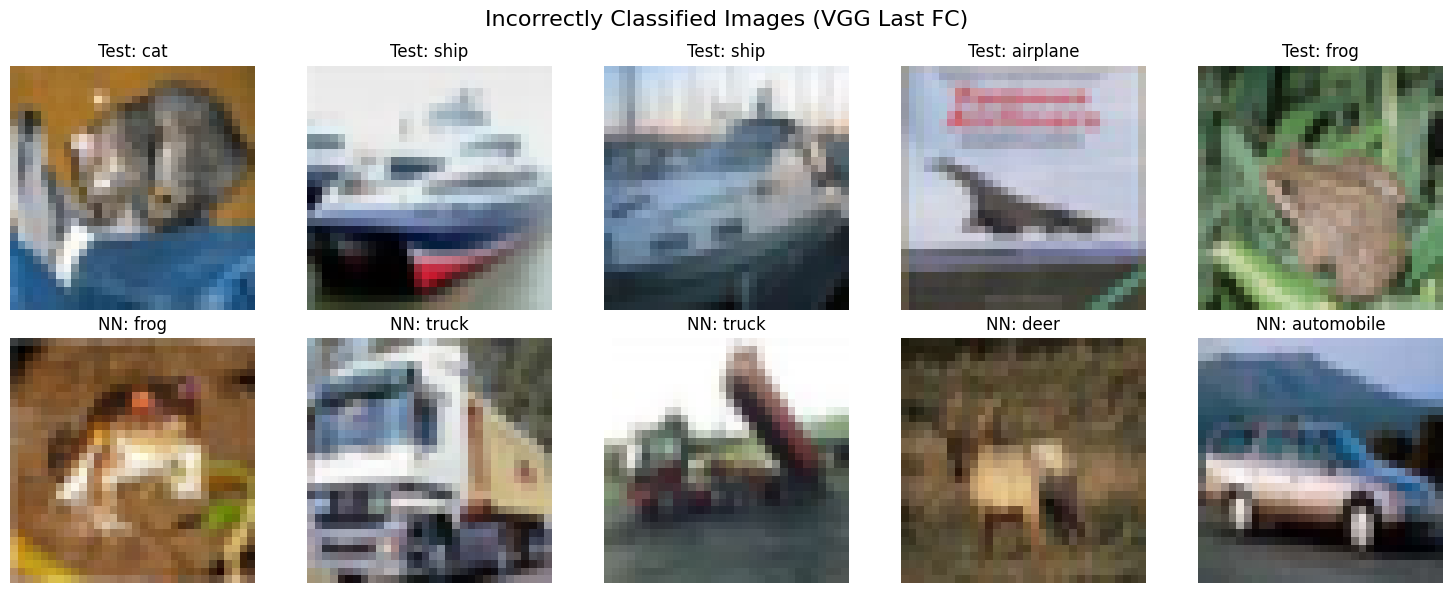

In [24]:
# Visualize nearest neighbor results for VGG last_fc representation
# Show correctly and incorrectly classified images with their nearest neighbors
from visual_nn_results import visualize_nn_results
visualize_nn_results(pretrained_cnn_last_fc_knn_classifier, x_train, y_train, x_test, y_test, feature_name="VGG Last FC")

### Model Performance Comparison

Let's compare the performance of the pretrained VGG model with our k-NN classifiers using CNN features to understand how well nearest neighbor classification approximates the original model's decision boundaries.

In [25]:
from vgg_network import test_pretrained_vgg

test_acc = test_pretrained_vgg(x_test, y_test)
print('Accuracy on the test images: ', test_acc) 

Accuracy on the test images:  0.9225


### Random CNN Features: Inductive Bias Analysis

Recent research has shown that CNN architectures capture important inductive biases about natural images, even without training. This phenomenon, explored in works like "Deep Image Prior," suggests that the convolutional structure itself encodes useful priors for image understanding.

We investigate whether these architectural inductive biases benefit classification by extracting features from a randomly initialized VGG network (no training) and comparing performance with trained features.

In [26]:
from extract_feature import compute_or_load_features

# compute or load features
random_cnn_last_conv_train_features, random_cnn_last_conv_test_features = compute_or_load_features(x_train, x_test, "random_cnn", "last_conv")

# run knn
random_cnn_last_conv_knn_classifier = run_nearest_neighbor(random_cnn_last_conv_train_features, y_train, random_cnn_last_conv_test_features, y_test)

======> Loaded train and test features from ./datasets/
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.394900


In [27]:
from extract_feature import compute_or_load_features

# compute or load features
random_cnn_last_fc_train_features, random_cnn_last_fc_test_features = compute_or_load_features(x_train, x_test, "random_cnn", "last_fc")

# run knn
random_cnn_last_fc_knn_classifier = run_nearest_neighbor(random_cnn_last_fc_train_features, y_train, random_cnn_last_fc_test_features, y_test)

======> Loaded train and test features from ./datasets/
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)
Nearest neighbor accuracy on the test set: 0.402700


## 6. Results Analysis and Discussion

### Performance Summary

The comparative analysis reveals interesting insights about different feature representations:

### Key Findings

1. **Traditional vs. Deep Features**: Comparison between HOG and CNN features reveals the power of learned representations
2. **Feature Hierarchy**: Different CNN layers capture features at various levels of abstraction  
3. **Architectural Inductive Bias**: Random CNN features demonstrate that network structure itself provides useful priors
4. **Representation Quality**: The relationship between feature dimensionality and classification performance

## References

1. D. Ulyanov, A. Vedaldi, and V. Lempitsky, [Deep Image Prior](https://arxiv.org/pdf/1711.10925.pdf), CVPR 2018.
2. M. Zeiler and R. Fergus, [Visualizing and Understanding Deep Neural Networks](https://arxiv.org/pdf/1311.2901.pdf), ECCV 2014.  
3. K. Simonyan and A. Zisserman, [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556), ICLR 2015.
4. A. Krizhevsky, [Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Technical Report, 2009.

## Conclusion

This analysis demonstrates how feature representation choice critically impacts classification performance. The progression from raw pixels through traditional computer vision features (HOG) to learned CNN representations shows the evolution of feature extraction methods in computer vision.

**Key Contributions:**
- Systematic comparison of feature representations on CIFAR-10
- Analysis of CNN feature hierarchy and architectural inductive bias
- Reproducible framework for feature extraction and evaluation
- Insights into the relationship between representation quality and classification performance

The results provide valuable insights for practitioners choosing appropriate feature representations for visual recognition tasks.